In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit

In [8]:
@njit
def single_walk(N:int, dim:int, time:int):
    X = np.zeros(shape=(N, dim), dtype=np.int64)
    _vectors = np.concatenate((np.eye(dim, dtype=np.int8), -np.eye(dim, dtype=np.int8)))
    for _ in range(time):
        _vec_idxs = np.empty(N, dtype=np.int8)
        for n in range(N):
            _vec_idxs[n] = np.random.randint(0, 2*dim)
        V = _vectors[_vec_idxs]
        X += V

    return X

In [9]:
import itertools

def pair_walk(N:int, dim:int, time:int):
    X = single_walk(N, dim, time)
    D = []
    for i, j in itertools.combinations(range(N), 2):
        D.append(np.linalg.norm(X[i] - X[j]))
    return D

In [10]:
@njit
def return_walk(N:int, dim:int, max_time:int):
    RET = np.zeros(N, dtype=np.int8)
    _vectors = np.concatenate((np.eye(dim, dtype=np.int8), -np.eye(dim, dtype=np.int8)))
    for n in range(N):
        X = np.zeros(dim, dtype=np.int64)
        for _ in range(max_time):
            _vec_idx = np.random.randint(2*dim)
            V = _vectors[_vec_idx]
            X += V
            if np.all(X == 0):
                RET[n] = 1
                break
    return RET

In [25]:
for d in range(1, 5):
    RET = return_walk(10000, d, 20000000)
    print('Returned:', RET.sum()/len(RET))

(array([1.71041195e-05, 2.22353553e-04, 7.35477138e-04, 1.45385016e-03,
        2.61693028e-03, 3.91684336e-03, 5.42200587e-03, 6.72191896e-03,
        6.87585603e-03, 7.76527024e-03, 7.83368672e-03, 7.69685377e-03,
        6.72191896e-03, 6.24300361e-03, 4.66942462e-03, 4.10498867e-03,
        3.48924037e-03, 2.90770031e-03, 1.50516251e-03, 1.28280896e-03,
        1.00914305e-03, 4.78915345e-04, 3.07874151e-04, 2.90770031e-04,
        1.36832956e-04, 1.19728836e-04, 5.13123584e-05, 5.13123584e-05,
        0.00000000e+00, 1.71041195e-05]),
 array([  4.69041576,  16.50161728,  28.3128188 ,  40.12402033,
         51.93522185,  63.74642337,  75.55762489,  87.36882641,
         99.18002794, 110.99122946, 122.80243098, 134.6136325 ,
        146.42483402, 158.23603555, 170.04723707, 181.85843859,
        193.66964011, 205.48084163, 217.29204316, 229.10324468,
        240.9144462 , 252.72564772, 264.53684924, 276.34805077,
        288.15925229, 299.97045381, 311.78165533, 323.59285685,
      

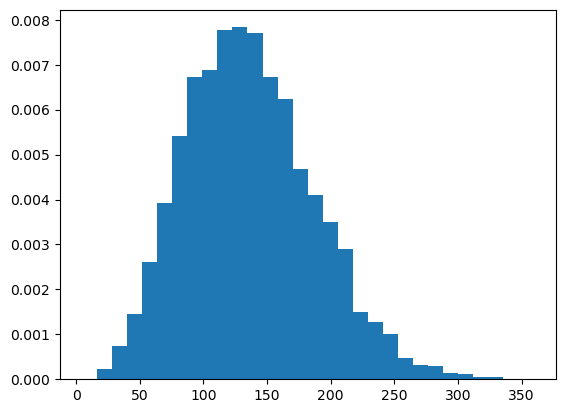

In [18]:
D = pair_walk(100, 4, 10000)
plt.hist(D, bins=30, density=True)


In [13]:
RET = single_walk(10000, 1, 10000)

9900